# Scrubbing and Cleaning Data - Lab

## Introduction

In the previous labs, you joined the data from our separate files into a single DataFrame.  In this lab, you'll scrub the data to get it ready for exploration and modeling!

## Objectives

You will be able to:

* Perform the full data cleaning process for a dataset
* Identify and deal with null values appropriately
* Remove unnecessary columns


## Getting Started

You'll find the resulting dataset from your work in the _Obtaining Data_ Lab stored within the file `'Lego_data_merged.csv'`.  

In the cells below:

* Import `pandas` and set the standard alias. 
* Import `numpy` and set the standard alias. 
* Import `matplotlib.pyplot` and set the standard alias. 
* Import `seaborn` and set the alias `sns` (this is the standard alias for seaborn). 
* Use the ipython magic command to set all matplotlib visualizations to display inline in the notebook. 
* Load the dataset stored in the `'Lego_data_merged.csv'` file into a DataFrame, `df`. 
* Inspect the head of the DataFrame to ensure everything loaded correctly. 

In [1]:
# Import statements go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Now, load in the dataset and inspect the head to make sure everything loaded correctly
df = pd.read_csv('Lego_data_merged.csv')
df.head()

,prod_id,ages,piece_count,set_name,prod_desc,prod_long_desc,theme_name,country,list_price,num_reviews,play_star_rating,review_difficulty,star_rating,val_star_rating
0,75823,6-12,277,Bird Island Egg Heist,Catapult into action and take back the eggs fr...,Use the staircase catapult to launch Red into ...,Angry Birds™,US,$29.99,2.0,4.0,Average,4.5,4.0
1,75822,6-12,168,Piggy Plane Attack,Launch a flying attack and rescue the eggs fro...,Pilot Pig has taken off from Bird Island with ...,Angry Birds™,US,$19.99,2.0,4.0,Easy,5.0,4.0
2,75821,6-12,74,Piggy Car Escape,Chase the piggy with lightning-fast Chuck and ...,Pitch speedy bird Chuck against the Piggy Car....,Angry Birds™,US,$12.99,11.0,4.3,Easy,4.3,4.1
3,21030,12+,1032,United States Capitol Building,Explore the architecture of the United States ...,Discover the architectural secrets of the icon...,Architecture,US,$99.99,23.0,3.6,Average,4.6,4.3
4,21035,12+,744,Solomon R. Guggenheim Museum®,Recreate the Solomon R. Guggenheim Museum® wit...,Discover the architectural secrets of Frank Ll...,Architecture,US,$79.99,14.0,3.2,Challenging,4.6,4.1


## Starting our Data Cleaning

To start, you'll deal with the most obvious issue: data features with the wrong data encoding.

### Checking Data Types

In the cell below, use the appropriate method to check the data type of each column. 

In [3]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prod_id            10870 non-null  int64  
 1   ages               10870 non-null  object 
 2   piece_count        10870 non-null  int64  
 3   set_name           10870 non-null  object 
 4   prod_desc          10512 non-null  object 
 5   prod_long_desc     10870 non-null  object 
 6   theme_name         10870 non-null  object 
 7   country            10870 non-null  object 
 8   list_price         10870 non-null  object 
 9   num_reviews        9449 non-null   float64
 10  play_star_rating   9321 non-null   float64
 11  review_difficulty  9104 non-null   object 
 12  star_rating        9449 non-null   float64
 13  val_star_rating    9301 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.2+ MB


Now, investigate some of the unique values inside of the `list_price` column.

### Numerical Data Stored as Strings

A common issue to check for at this stage is numeric columns that have accidentally been encoded as strings. For example, you should notice that the `list_price` column above is currently formatted as a string and contains a proceeding '$'. Remove this and convert the remaining number to a `float` so that you can later model this value. After all, your primary task is to generate model to predict the price.

> Note: While the data spans a multitude of countries, assume for now that all prices have been standardized to USD.

In [4]:
# Create a function that removes all non-numerical characters from a string (except for .)
import re

def reformat_list_price(val):
    return float(re.sub('[^0-9.]', '', val))

In [5]:
# Apply above function on df.list_price
df.list_price = df.list_price.apply(reformat_list_price)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prod_id            10870 non-null  int64  
 1   ages               10870 non-null  object 
 2   piece_count        10870 non-null  int64  
 3   set_name           10870 non-null  object 
 4   prod_desc          10512 non-null  object 
 5   prod_long_desc     10870 non-null  object 
 6   theme_name         10870 non-null  object 
 7   country            10870 non-null  object 
 8   list_price         10870 non-null  float64
 9   num_reviews        9449 non-null   float64
 10  play_star_rating   9321 non-null   float64
 11  review_difficulty  9104 non-null   object 
 12  star_rating        9449 non-null   float64
 13  val_star_rating    9301 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.2+ MB


### Detecting and Dealing With Null Values

Next, it's time to check for null values. How to deal with the null values will be determined by the columns containing them, and how many null values exist in each.  
 
In the cell below, get a count of how many null values exist in each column in the DataFrame. 

In [7]:
for col in df.columns:
    num_na = df[col].isna().sum()
    if num_na > 0:
        print(f'{col}: {num_na} Null Values') 
        print()

prod_desc: 358 Null Values

num_reviews: 1421 Null Values

play_star_rating: 1549 Null Values

review_difficulty: 1766 Null Values

star_rating: 1421 Null Values

val_star_rating: 1569 Null Values



Now, get some descriptive statistics for each of the columns. You want to see where the minimum and maximum values lie.  

In [8]:
df.describe()

,prod_id,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating
count,1.087000e+04,10870.000000,10870.000000,9449.000000,9321.000000,9449.000000,9301.000000
mean,6.181634e+04,503.936431,67.309137,17.813737,4.355413,4.510319,4.214439
std,1.736390e+05,831.209318,94.669414,38.166693,0.617272,0.516463,0.670906
min,6.300000e+02,1.000000,2.272400,1.000000,1.000000,1.800000,1.000000
25%,2.112300e+04,97.000000,21.899000,2.000000,4.000000,4.300000,4.000000
50%,4.207350e+04,223.000000,36.587800,6.000000,4.500000,4.600000,4.300000
75%,7.124800e+04,556.000000,73.187800,14.000000,4.800000,5.000000,4.700000
max,2.000431e+06,7541.000000,1104.870000,367.000000,5.000000,5.000000,5.000000


Now that you have a bit more of a understanding of each of these features you can make an informed decision about the best strategy for dealing with the various null values. 

Some common strategies for filling null values include:
* Using the mean of the feature
* Using the median of the feature
* Inserting a random value from a normal distribution with the mean and std of the feature
* Binning

Given that most of the features with null values concern user reviews of the lego set, it is reasonable to wonder whether there is strong correlation between these features in the first place. Before proceeding, take a minute to investigate this hypothesis.

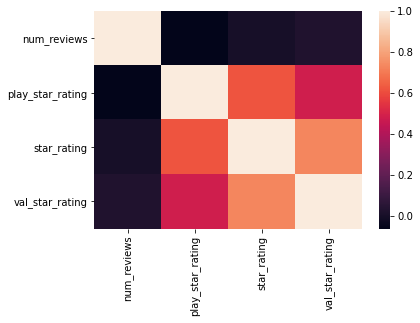

In [9]:
# Investigate whether multicollinearity exists between the review features 
review_features = ['num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']

review_corr = df[review_features].corr()

sns.heatmap(review_corr);

In [10]:
review_corr

,num_reviews,play_star_rating,star_rating,val_star_rating
num_reviews,1.000000,-0.060884,0.004541,0.026664
play_star_rating,-0.060884,1.000000,0.619246,0.484341
star_rating,0.004541,0.619246,1.000000,0.731538
val_star_rating,0.026664,0.484341,0.731538,1.000000


Note that there is substantial correlation between the `play_star_rating`, `star_rating` and `val_star_rating`. While this could lead to multicollinearity in your eventual regression model, it is too early to clearly determine this at this point. Remember that multicollinearity is a relationship between 3 or more variables while correlation simply investigates the relationship between two variables.

Additionally, these relationships provide an alternative method for imputing missing values: since they appear to be correlated, you could use these features to help impute missing values in the others features. For example, if you are missing the `star_rating` for a particular row but have the `val_star_rating` for that same entry, it seems reasonable to assume that it is a good estimate for the missing `star_rating` value as they are highly correlated. That said, doing so does come with risks; indeed you would be further increasing the correlation between these features which could further provoke multicollinearity in the final model.

Investigate if you could use one of the other star rating features when one is missing. How many rows have one of `play_star_rating`, `star_rating` and `val_star_rating` missing, but not all three.

In [11]:
# Number missing all three: 1421
len(df[(df.play_star_rating.isna() == True) & (df.star_rating.isna() == True) & (df.val_star_rating.isna() == True)])

1421

Well, it seems like when one is missing, the other two are also apt to be missing. While this has been a bit of an extended investigation, simply go ahead and fill the missing values with that feature's median. Fill in the missing values of `review_difficulty` feature  with string `'unknown'`.

In [12]:
for c in ['num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']:
    df[c] = df[c].fillna(df[c].median())

In [13]:
df.review_difficulty = df.review_difficulty.fillna('unknown')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prod_id            10870 non-null  int64  
 1   ages               10870 non-null  object 
 2   piece_count        10870 non-null  int64  
 3   set_name           10870 non-null  object 
 4   prod_desc          10512 non-null  object 
 5   prod_long_desc     10870 non-null  object 
 6   theme_name         10870 non-null  object 
 7   country            10870 non-null  object 
 8   list_price         10870 non-null  float64
 9   num_reviews        10870 non-null  float64
 10  play_star_rating   10870 non-null  float64
 11  review_difficulty  10870 non-null  object 
 12  star_rating        10870 non-null  float64
 13  val_star_rating    10870 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.2+ MB


## Normalizing the Data

Now, you'll need to convert all of our numeric columns to the same scale by **_normalizing_** our dataset.  Recall that you normalize a dataset by converting each numeric value to it's corresponding z-score for the column, which is obtained by subtracting the column's mean and then dividing by the column's standard deviation for every value. 


In the cell below:

* Normalize the numeric X features by subtracting the column mean and dividing by the column standard deviation. 
(Don't bother to normalize the `list_price` as this is the feature you will be predicting.)

In [15]:
# Your code here
df.describe()

,prod_id,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating
count,1.087000e+04,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000,10870.000000
mean,6.181634e+04,503.936431,67.309137,16.269365,4.376017,4.522042,4.226789
std,1.736390e+05,831.209318,94.669414,35.806576,0.573827,0.482468,0.621323
min,6.300000e+02,1.000000,2.272400,1.000000,1.000000,1.800000,1.000000
25%,2.112300e+04,97.000000,21.899000,3.000000,4.100000,4.300000,4.000000
50%,4.207350e+04,223.000000,36.587800,6.000000,4.500000,4.600000,4.300000
75%,7.124800e+04,556.000000,73.187800,12.000000,4.700000,4.900000,4.600000
max,2.000431e+06,7541.000000,1104.870000,367.000000,5.000000,5.000000,5.000000


In [16]:
def normalize(cols, df):
    output = pd.DataFrame([])
    for c in cols:
        output[f'normalized_{c}'] = (df[c] - np.mean(df[c])) / np.std(df[c])
    return output

In [17]:
to_normalize = ['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']

final_num = normalize(to_normalize, df)

In [18]:
final_num.head()

,normalized_piece_count,normalized_num_reviews,normalized_play_star_rating,normalized_star_rating,normalized_val_star_rating
0,-0.273032,-0.398531,-0.655309,-0.045689,-0.365027
1,-0.404172,-0.398531,-0.655309,0.990697,-0.365027
2,-0.517266,-0.147169,-0.132479,-0.460243,-0.204073
3,0.635325,0.187981,-1.352415,0.161588,0.117836
4,0.288826,-0.063381,-2.049521,0.161588,-0.204073


## Saving Your Results

While you'll once again practice one-hot encoding as you would to preprocess data before fitting a model, saving such a reperesentation of the data will eat up additional disk space. After all, a categorical variable with 10 bins will be transformed to 10 seperate features when passed through `pd.get_dummies()`. As such, while further practice is worthwhile, save your DataFrame as-is for now.

## One-Hot Encoding Categorical Columns

As a final step, you'll need to deal with the categorical columns by **_one-hot encoding_** them into binary variables via the `pd.get_dummies()` function.  

When doing this, you may also need to subset the appropriate features to avoid encoding the wrong data. The `get_dummies()` function by default converts all columns with *object* or *category* dtype. However, you should always check the result of calling `get_dummies()` to ensure that only the categorical variables have been transformed. Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) for more details. If you are ever unsure of the data types, call the `.info()` method.

In the cell below, subset to the appropriate predictive features and then use `pd.get_dummies()` to one-hot encode the dataset properly.

[CB] I am using **sklearn**'s **OneHotEncoder()** instead because it would help with transforming test dataset later on. 

In [20]:
from sklearn.preprocessing import OneHotEncoder

categoricals = ['ages', 'theme_name', 'country', 'review_difficulty']
ohe = OneHotEncoder(drop='first')
ohe.fit(df[categoricals])
cat_matrix = ohe.transform(df[categoricals]).todense()

final_cat = pd.DataFrame(cat_matrix, columns=ohe.get_feature_names())

In [21]:
final_cat.shape

(10870, 93)

In [22]:
preprocessed = pd.concat([df.list_price, final_num, final_cat], axis=1)

In [23]:
preprocessed.head()

,list_price,normalized_piece_count,normalized_num_reviews,normalized_play_star_rating,normalized_star_rating,normalized_val_star_rating,x0_10-14,x0_10-16,x0_10-21,x0_11-16,...,x2_NO,x2_NZ,x2_PL,x2_PT,x2_US,x3_Challenging,x3_Easy,x3_Very Challenging,x3_Very Easy,x3_unknown
0,29.99,-0.273032,-0.398531,-0.655309,-0.045689,-0.365027,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,19.99,-0.404172,-0.398531,-0.655309,0.990697,-0.365027,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,12.99,-0.517266,-0.147169,-0.132479,-0.460243,-0.204073,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,99.99,0.635325,0.187981,-1.352415,0.161588,0.117836,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,79.99,0.288826,-0.063381,-2.049521,0.161588,-0.204073,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


That's it! You've now successfully scrubbed your dataset -- you're now ready for data exploration and modeling!

## Summary

In this lesson, you gained practice with scrubbing and cleaning data. Specifically, you addressed an incorrect data type, detected and dealt with null values, checked for multicollinearity, and transformed data. Congrats on performing the full data cleaning process for a dataset!